a) Number of components generated: 7

b) Feature weights for each component:
       mois      prot       fat       ash    sodium      carb       cal
0  0.064709  0.378761  0.446666  0.471890  0.435703 -0.424914  0.244487
1 -0.628276 -0.269707  0.234379 -0.110990  0.201662  0.320312  0.567458
2 -0.421669  0.746027 -0.199309  0.056273 -0.455169  0.052237  0.113316
3 -0.220722 -0.010593 -0.507042  0.552399  0.446277  0.334339 -0.279263
4 -0.006470 -0.387983  0.173368  0.670886 -0.602614  0.007437  0.078003
5  0.446450 -0.000172 -0.525403  0.058861  0.003131 -0.000509  0.721914
6  0.418569  0.276765  0.377672  0.056021 -0.000524  0.776068  0.012060


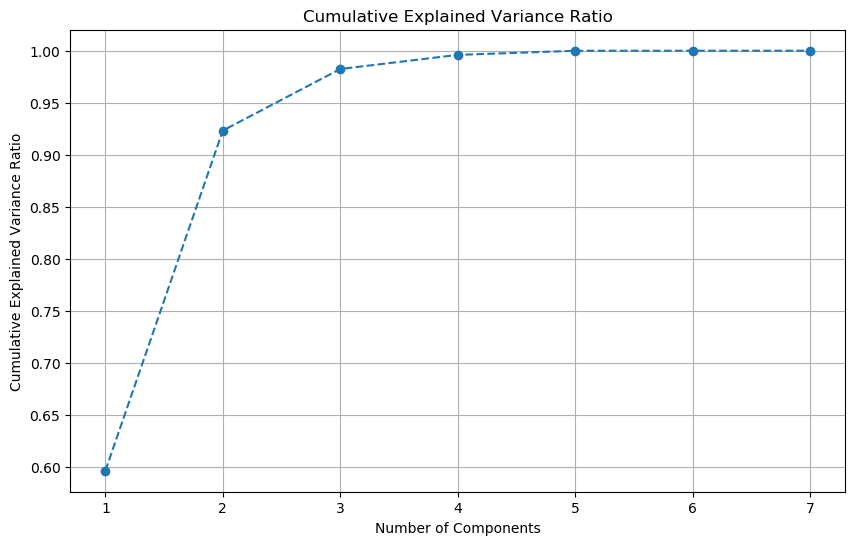


c) Number of components to keep: 3

d) Selected features based on components to keep:
Index(['mois', 'prot', 'fat'], dtype='object')


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


flight_data = pd.read_csv("./Pizza.csv")

X = flight_data.drop(columns=['id','brand'])
y = flight_data['brand']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)
pca.fit(X_scaled)


num_components = pca.n_components_
print(f"a) Number of components generated: {num_components}")

feature_weights = pd.DataFrame(pca.components_, columns=X.columns)
print("\nb) Feature weights for each component:")
print(feature_weights)

# print('\nFeature Importance:')

# for i, col in enumerate(X.columns):
#     print(f'{col}: {pca.components_[0][i]:.2f}')


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

threshold_variance = 0.95

num_components_to_keep = len(cumulative_explained_variance[cumulative_explained_variance < threshold_variance]) + 1
print(f"\nc) Number of components to keep: {num_components_to_keep}")

selected_features = feature_weights.iloc[:, :num_components_to_keep].columns
print("\nd) Selected features based on components to keep:")
print(selected_features)
